In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=pd.concat([df_train,df_test])

In [3]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
(df['Gender'].value_counts(), '----------------------', 
df['Company Type'].value_counts(), '----------------------',
df['WFH Setup Available'].value_counts(), '----------------------',
df['Designation'].value_counts().sort_index(), '----------------------',
df['Resource Allocation'].value_counts().sort_index(), '----------------------',
)

(Female    18353
 Male      16647
 Name: Gender, dtype: int64,
 '----------------------',
 Service    22837
 Product    12163
 Name: Company Type, dtype: int64,
 '----------------------',
 Yes    18928
 No     16072
 Name: WFH Setup Available, dtype: int64,
 '----------------------',
 0.0     2349
 1.0     7467
 2.0    11661
 3.0     9261
 4.0     3669
 5.0      593
 Name: Designation, dtype: int64,
 '----------------------',
 1.0     2847
 2.0     3267
 3.0     5052
 4.0     6082
 5.0     6081
 6.0     4700
 7.0     3006
 8.0     1644
 9.0      680
 10.0     260
 Name: Resource Allocation, dtype: int64,
 '----------------------')

In [5]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [6]:
df.isnull().sum()

Employee ID                 0
Date of Joining             0
Gender                      0
Company Type                0
WFH Setup Available         0
Designation                 0
Resource Allocation      1381
Mental Fatigue Score     2117
Burn Rate               13374
dtype: int64

In [7]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,NaN
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,NaN
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,NaN
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,NaN


In [8]:
df['Date of Joining']=pd.to_datetime(df['Date of Joining'])

In [9]:
df.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [10]:
gender = {'Female': 1,'Male': 0}
df['Gender']=[gender[i] for i in df['Gender']]

In [11]:
company_type = {'Service': 1,'Product': 0}
df['Company Type'] = [company_type[i] for i in df['Company Type']]

In [12]:
wfh_setup_avail = {'No': 0,'Yes': 1}
df['WFH Setup Available'] = [wfh_setup_avail[i] for i in df['WFH Setup Available']]

In [13]:
df['Designation'] = df['Designation'].astype('Int64')

In [14]:
df['Resource Allocation'] = df['Resource Allocation'].astype('Int64')

In [15]:
df.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation              Int64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [16]:
index = [ 'Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','Burn Rate']
columns = ['original', 'dropna']
df_ = pd.DataFrame(index=index, columns=columns)

for i in index:
    value_og = '{:.3f} ({:.3f})'.format(df[i].mean(), df[i].std())
    df_.loc[i, 'original'] = value_og
    
for i in index:
    value_na = '{:.3f} ({:.3f})'.format(df.dropna()[i].mean(), df.dropna()[i].std())
    df_.loc[i, 'dropna'] = value_na

In [17]:
df_

,original,dropna
Gender,0.524 (0.499),0.524 (0.499)
Company Type,0.652 (0.476),0.655 (0.475)
WFH Setup Available,0.541 (0.498),0.540 (0.498)
Designation,2.178 (1.134),2.179 (1.133)
Resource Allocation,4.473 (2.047),4.487 (2.045)
Mental Fatigue Score,5.725 (1.918),5.732 (1.921)
Burn Rate,0.452 (0.198),0.452 (0.198)


In [18]:
df=df.dropna()

In [19]:
df[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.736412,0.855005,0.944389,1.000000


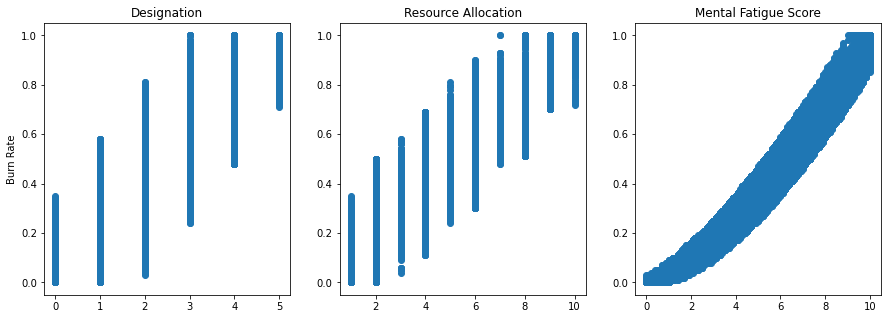

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['Designation'],df['Burn Rate'])
axs[0].set_title('Designation')
axs[0].set(ylabel='Burn Rate')
axs[1].scatter(df['Resource Allocation'],df['Burn Rate'])
axs[1].set_title('Resource Allocation')
axs[2].scatter(df['Mental Fatigue Score'],df['Burn Rate'])
axs[2].set_title('Mental Fatigue Score')
plt.show()

In [21]:
df['Month of Joining'] = df['Date of Joining'].dt.month


df['Quarter of Joining'] = df['Date of Joining'].dt.quarter

from datetime import date, datetime

seasons = {'Summer':(datetime(2008,6,21), datetime(2008,9,22)),
           'Autumn':(datetime(2008,9,23), datetime(2008,12,20)),
           'Spring':(datetime(2008,3,21), datetime(2008,6,20))}

def get_season(row):
    date = row['Date of Joining']
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Winter'
    
df['Season of Joining'] = df.apply(lambda row: get_season(row), axis=1)

<ipython-input-21-6f7272beb944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month of Joining'] = df['Date of Joining'].dt.month
<ipython-input-21-6f7272beb944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter of Joining'] = df['Date of Joining'].dt.quarter
<ipython-input-21-6f7272beb944>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [22]:
quater_dummies_train = pd.get_dummies(df['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_train = pd.get_dummies(df['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_train = pd.get_dummies(df['Designation'], prefix='Designation', drop_first=False)

df = pd.concat([df, designation_dummies_train, quater_dummies_train, season_dummies_train], axis=1)


In [23]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month of Joining,...,Designation_4,Designation_5,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,fffe32003000360033003200,2008-09-30,1,1,0,2,3,3.8,0.16,9,...,0,0,0,0,1,0,1,0,0,0
1,fffe3700360033003500,2008-11-30,0,1,1,1,2,5.0,0.36,11,...,0,0,0,0,0,1,1,0,0,0
3,fffe32003400380032003900,2008-11-03,0,1,1,1,1,2.6,0.20,11,...,0,0,0,0,0,1,1,0,0,0
4,fffe31003900340031003600,2008-07-24,1,1,0,3,7,6.9,0.52,7,...,0,0,0,0,1,0,0,0,1,0
5,fffe3300350037003500,2008-11-26,0,0,1,2,4,3.6,0.29,11,...,0,0,0,0,0,1,1,0,0,0


In [24]:
X = df.drop(['Burn Rate','Date of Joining','Quarter of Joining','Season of Joining','Employee ID'], axis=1)
y = df['Burn Rate']

In [25]:
X.dtypes

Gender                    int64
Company Type              int64
WFH Setup Available       int64
Designation               Int64
Resource Allocation       Int64
Mental Fatigue Score    float64
Month of Joining          int64
Designation_0             uint8
Designation_1             uint8
Designation_2             uint8
Designation_3             uint8
Designation_4             uint8
Designation_5             uint8
Quarter_1                 uint8
Quarter_2                 uint8
Quarter_3                 uint8
Quarter_4                 uint8
Season_Autumn             uint8
Season_Spring             uint8
Season_Summer             uint8
Season_Winter             uint8
dtype: object

In [27]:
(X['Gender'].value_counts(), '----------------------', 
X['Company Type'].value_counts(), '----------------------',
X['WFH Setup Available'].value_counts(), '----------------------',
X['Designation'].value_counts().sort_index(), '----------------------',
X['Resource Allocation'].value_counts().sort_index(), '----------------------',
)

(1    9747
 0    8843
 Name: Gender, dtype: int64,
 '----------------------',
 1    12174
 0     6416
 Name: Company Type, dtype: int64,
 '----------------------',
 1    10030
 0     8560
 Name: WFH Setup Available, dtype: int64,
 '----------------------',
 0    1238
 1    3954
 2    6214
 3    4920
 4    1947
 5     317
 Name: Designation, dtype: Int64,
 '----------------------',
 1     1551
 2     1794
 3     2761
 4     3396
 5     3364
 6     2590
 7     1697
 8      907
 9      396
 10     134
 Name: Resource Allocation, dtype: Int64,
 '----------------------')

In [26]:
X.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining',
       'Designation_0', 'Designation_1', 'Designation_2', 'Designation_3',
       'Designation_4', 'Designation_5', 'Quarter_1', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [29]:
X.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Designation_0,Designation_1,Designation_2,...,Designation_4,Designation_5,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1,1,0,2,3,3.8,9,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,0,1,1,1,2,5.0,11,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,0,1,1,1,1,2.6,11,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,1,1,0,3,7,6.9,7,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,2,4,3.6,11,0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
grid_param = {
    'criterion': ['mse', 'friedman_mse'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_clf = RandomForestRegressor(random_state=6)
rand_clf.fit(x_train,y_train)

In [ ]:
rand_clf.score(x_test,y_test)

In [ ]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_score_

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
import pickle
with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(rand_clf,f)

In [ ]:
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [30]:
a={'k':1,'l':2}

In [32]:
pd.DataFrame(a)

ValueError: If using all scalar values, you must pass an index

In [ ]:
gender = request.form['gender']
                if gender=='Male':
                    gender = 0
                else:
                    gender=1
                company_type=request.form['company_type']
                if company_type== 'Service':
                    company_type=1
                else:
                    company_type=0
                wfh_setup_avail=request.form['wfh_setup_avail']
                if wfh_setup_avail=='Yes':
                    wfh_setup_avail=1
                else:
                    wfh_setup_avail=0
                Designation=int(request.form['Designation'])
                if Designation==0:
                    Designation_0 =1
                    Designation_1 =0
                    Designation_2 =0
                    Designation_3 =0
                    Designation_4 =0
                    Designation_5 =0
                elif Designation==1:
                    Designation_0 = 0
                    Designation_1 = 1
                    Designation_2 = 0
                    Designation_3 = 0
                    Designation_4 = 0
                    Designation_5 = 0
                elif Designation==2:
                    Designation_0 = 0
                    Designation_1 = 0
                    Designation_2 = 1
                    Designation_3 = 0
                    Designation_4 = 0
                    Designation_5 = 0
                elif Designation==3:
                    Designation_0 = 0
                    Designation_1 = 0
                    Designation_2 = 0
                    Designation_3 = 1
                    Designation_4 = 0
                    Designation_5 = 0
                elif Designation==4:
                    Designation_0 = 0
                    Designation_1 = 0
                    Designation_2 = 0
                    Designation_3 = 0
                    Designation_4 = 1
                    Designation_5 = 0
                else:
                    Designation_0 = 0
                    Designation_1 = 0
                    Designation_2 = 0
                    Designation_3 = 0
                    Designation_4 = 0
                    Designation_5 = 1
                Quarter = int(request.form['Quarter'])
                if Quarter==1:
                    Quarter_1=1
                    Quarter_2=0
                    Quarter_3=0
                    Quarter_4=0
                elif Quarter==2:
                    Quarter_1 = 0
                    Quarter_2 = 1
                    Quarter_3 = 0
                    Quarter_4 = 0
                elif Quarter==3:
                    Quarter_1 = 0
                    Quarter_2 = 0
                    Quarter_3 = 1
                    Quarter_4 = 0
                else:
                    Quarter_1 = 0
                    Quarter_2 = 0
                    Quarter_3 = 0
                    Quarter_4 = 1
                Season= request.form(['Season'])
                if Season=='Autumn':
                    Season_Autumn=1
                    Season_Spring=0
                    Season_Summer=0
                    Season_Winter=0
                elif Season=='Spring':
                    Season_Autumn = 0
                    Season_Spring = 1
                    Season_Summer = 0
                    Season_Winter = 0
                elif Season =='Summer':
                    Season_Autumn = 0
                    Season_Spring = 0
                    Season_Summer = 1
                    Season_Winter = 0
                else:
                    Season_Autumn = 0
                    Season_Spring = 0
                    Season_Summer = 0
                    Season_Winter = 1
                mon_of_join=int(request.form(['mon_of_join']))
                men_fatigue_score=float(request.form(['men_fatigue_score']))
                res_al=int(request.form(['res_al']))
                dict_pred={
                    'gender':gender,
                    'company_type':company_type,
                    'wfh_setup_avail':wfh_setup_avail,
                    'Designation':Designation,
                    'res_al':res_al,
                    'men_fatigue_score':men_fatigue_score,
                    'mon_of_join':mon_of_join,
                    'Designation_0':Designation_0,
                    'Designation_1':Designation_1,
                    'Designation_2':Designation_2,
                    'Designation_3':Designation_3,
                    'Designation_4':Designation_4,
                    'Designation_5':Designation_5,
                    'Quarter_1':Quarter_1,
                    'Quarter_2':Quarter_2,
                    'Quarter_3':Quarter_3,
                    'Quarter_4':Quarter_4,
                    'Season_Autumn':Season_Autumn,
                    'Season_Spring':Season_Spring,
                    'Season_Summer':Season_Summer,
                    'Season_Winter':Season_Winter
                    }

In [34]:
import pickle          
with open("modelForPrediction.sav", 'rb') as f:
    model = pickle.load(f)

In [39]:
model.predict(pd.DataFrame([[0,1,2,2,3,1,2,2,2,1,2,3,1,2,1,0,0,0,0,0,0]]))

array([0.0391])